<a href="https://www.kaggle.com/code/shayannavaie/svm-breast-cancer-classification?scriptVersionId=136329800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents

## Context:
We have used the scikit-learn cancer dataset, which contains information about features of cell nuclei present in digitized images of breast mass samples, to develop a machine learning model for cancer diagnosis. The dataset includes 569 samples, with each sample having 30 features that describe the characteristics of the cell nuclei.


## Content:
##### The scikit-learn cancer dataset includes information on various features of cell nuclei present in digitized images of breast mass samples. The features include the following



## Dataset Glossary (Column-Wise):

##### 1.Mean radius: the average distance from the center to points on the perimeter of the cell nuclei.
##### 2.Mean texture: the average standard deviation of gray-scale values in the image.
##### 3.Mean perimeter: the average perimeter of the cell nuclei.
##### 4.Mean area: the average area of the cell nuclei.
##### 5.Mean smoothness: the average local variation in radius lengths.
##### 6.Mean compactness: the average value of perimeter^2 / area - 1.0.
##### 7.Mean concavity: the average severity of concave portions of the contour.
##### 8.Mean concave points: the average number of concave portions of the contour.
##### 9.Mean symmetry: the average symmetry of the cell nuclei.
##### 10.Mean fractal dimension: the average "coastline approximation" - 1.
##### 11.Radius error: the standard error of the mean distance from the center to points on the perimeter of the cell nuclei.
##### 12.Texture error: the standard error of the standard deviation of gray-scale values in the image.
##### 13.Perimeter error: the standard error of the perimeter of the cell nuclei.
##### 14.Area error: the standard error of the area of the cell nuclei.
##### 15.Smoothness error: the standard error of the local variation in radius lengths.
##### 16.Compactness error: the standard error of perimeter^2 / area - 1.0.
##### 17.Concavity error: the standard error of the severity of concave portions of the contour.
##### 18.Concave points error: the standard error of the number of concave portions of the contour.
##### 19.Symmetry error: the standard error of the symmetry of the cell nuclei.
##### 20.Fractal dimension error: the standard error of the "coastline approximation" - 1.
##### 21.Worst radius: the largest distance from the center to points on the perimeter of the cell nuclei.
##### 22.Worst texture: the largest standard deviation of gray-scale values in the image.
##### 23.Worst perimeter: the largest perimeter of the cell nuclei.
##### 24.Worst area: the largest area of the cell nuclei.
##### 25.Worst smoothness: the largest local variation in radius lengths.
##### 26.Worst compactness: the largest value of perimeter^2 / area - 1.0.
##### 27.Worst concavity: the largest severity of concave portions of the contour.
##### 28.Worst concave points: the largest number of concave portions of the contour.
##### 29.Worst symmetry: the largest symmetry of the cell nuclei.
##### 30.Worst fractal dimension: the largest "coastline approximation" - 1.

# **Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer


%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Load Data From Sklearn**

In [2]:
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
dataset['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [4]:
print("classes : ",  dataset['target_names'])

classes :  ['malignant' 'benign']


In [5]:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
nan_count = df.isna().sum().sum()
print(nan_count)

0


## **Visualization**

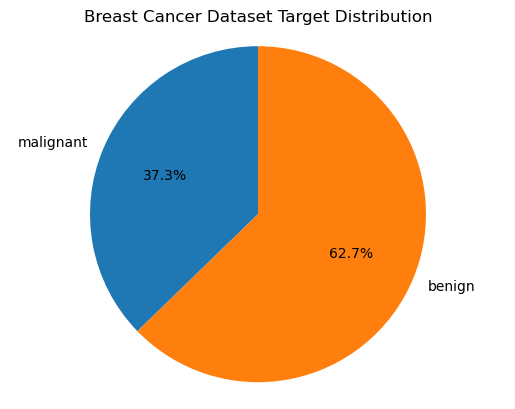

In [9]:
target_names = dataset.target_names
target_counts = [sum(dataset.target == i) for i in range(len(target_names))]


fig, ax = plt.subplots()
ax.pie(target_counts, labels=target_names, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
ax.set_title('Breast Cancer Dataset Target Distribution')


plt.show()

In [10]:
X = df
y= dataset['target']

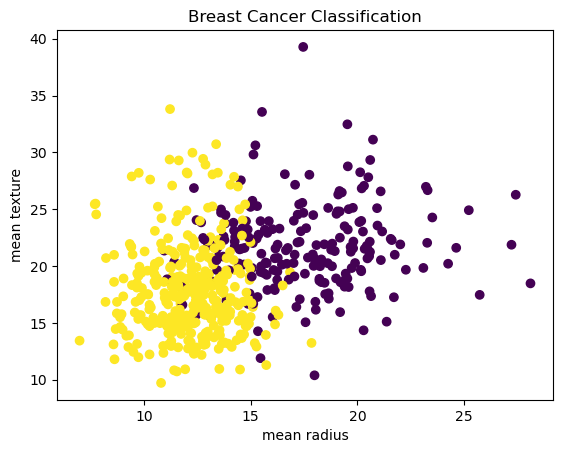

In [11]:
plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=dataset.target)


plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.title("Breast Cancer Classification")


plt.show()

## **Data Spilt**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## **Scaling Data**

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **SVM Model**

In [14]:
model = SVC(kernel='linear', C = 10, gamma = 0.01, degree=2, class_weight= 'balanced')

In [15]:
model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', degree=2, gamma=0.01, kernel='linear')

In [16]:
prediction = model.predict(X_test)

## **Evaluation metrics**

In [17]:
print(confusion_matrix(y_test, prediction))

[[39  3]
 [ 8 64]]


In [18]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.96      0.89      0.92        72

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



## **hyperparameter tuning**

In [19]:
param_grid = {"C":[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['linear', 'poly', 'rbf','sigmoid'], 'degree':[2,3,4], 'class_weight':['balanced', None]}
grid = GridSearchCV(SVC(), param_grid, verbose = 3)

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=poly;, score=0.824 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=poly;, score=0.923 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=poly;, score=0.879 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=balanced, degree=2, gamma=1, kernel=p

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 0.001,
 'kernel': 'rbf'}

In [22]:
grid.best_estimator_

SVC(C=10, class_weight='balanced', degree=2, gamma=0.001)

In [23]:
grid_prediction = grid.predict(X_test)

## **Evaluation metrics after hyperparameter tuning technique**

In [24]:
print(confusion_matrix(y_test, grid_prediction))

[[41  1]
 [ 1 71]]


In [25]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

